In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from config import gkey
import gmaps.datasets
import gmaps
import time

In [2]:

TPS_df = pd.read_csv("Accident_info.csv")

TPS_df

,Unnamed: 0,LATITUDE,LONGITUDE,DATE,TIME,YEAR,ACCIDENT LANE,District,INTERSECTION,VICTIM,VICTIM AGE,VEHTYPE,DRIVACT,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,Cause,Neighbourh
0,0,43.816245,-79.227590,2012-01-12T05:00:00.000Z,558,2012,Minor Arterial,Scarborough,Intersection,Pedestrian,40 to 44,Other,,Yes,,Yes,,,,Malvern (132)
1,1,43.637614,-79.447742,2013-11-29T05:00:00.000Z,558,2013,Major Arterial,Toronto and East York,Mid-Block,Driver,25 to 29,"Automobile, Station Wagon",Lost control,,,Yes,,,Speeding,South Parkdale (85)
2,2,43.716773,-79.259883,2018-06-14T04:00:00.000Z,558,2018,Major Arterial,Scarborough,Intersection,Motorcycle Driver,55 to 59,Motorcycle,Driving Properly,,,Yes,Yes,,Unknown,Clairlea-Birchmount (120)
3,3,43.821345,-79.316890,2010-04-13T04:00:00.000Z,559,2010,Major Arterial,Scarborough,Intersection,Passenger,70 to 74,Other,,,,Yes,,,,Steeles (116)
4,4,43.728129,-79.574641,2014-11-09T05:00:00.000Z,559,2014,Major Arterial,Etobicoke York,Intersection,Passenger,20 to 24,,,,,Yes,,,,Rexdale-Kipling (4)
5,5,43.758048,-79.513431,2014-11-21T05:00:00.000Z,600,2014,Major Arterial,Etobicoke York,Intersection,Pedestrian,60 to 64,,,Yes,,Yes,,,,Glenfield-Jane Heights (25)
6,6,43.801421,-79.263774,2015-11-24T05:00:00.000Z,603,2015,Major Arterial,Scarborough,Intersection,Pedestrian,25 to 29,,,Yes,,Yes,,,Speeding,Agincourt North (129)
7,7,43.652745,-79.437390,2011-08-16T04:00:00.000Z,606,2011,Laneway,Toronto and East York,"Park, Private Property, Public Lane",Driver,55 to 59,"Automobile, Station Wagon",Other,,,Yes,,,Unknown,Dufferin Grove (83)
8,8,43.699229,-79.587123,2014-05-21T04:00:00.000Z,610,2014,Major Arterial,Etobicoke York,Intersection,Driver,40 to 44,"Automobile, Station Wagon",Driving Properly,,,Yes,,,Unknown,West Humber-Clairville (1)
9,9,43.664164,-79.326206,2015-09-18T04:00:00.000Z,610,2015,Minor Arterial,Toronto and East York,Intersection,Motorcycle Driver,35 to 39,Motorcycle,Lost control,,,,Yes,,Lost control,Greenwood-Coxwell (65)


In [3]:
lats=[]
lngs=[]
for index,row in TPS_df.iterrows():
    lats.append(row[1])
    lngs.append(row[2])


In [4]:
income_df=pd.read_csv('Population Income Neighborhood.csv')
income_df.head()

,Unnamed: 0,Category,Population,Neighborhood Mean Income,Lat,Long
0,0,Agincourt North,"29,113",52532.74050,43.808053,-79.266502
1,1,Agincourt South-Malvern West,"23,757",50550.17153,43.788009,-79.283882
2,2,Alderwood,"12,054",55229.36660,43.601710,-79.545238
3,3,Annex,"30,526",45009.96767,43.669833,-79.407585
4,4,Banbury-Don Mills,"27,695",52962.59704,43.749115,-79.366359


In [5]:
# enable jupyter extensions
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
# install gmaps
!pip install gmaps
# enable gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [8]:
gmaps.configure(api_key=gkey)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(TPS_df[["LATITUDE","LONGITUDE"]],max_intensity=3)
fig.add_layer(heat_layer)
marker_layer = gmaps.symbol_layer(income_df[["Lat","Long"]],stroke_opacity=0.4,fill_opacity=0.4)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


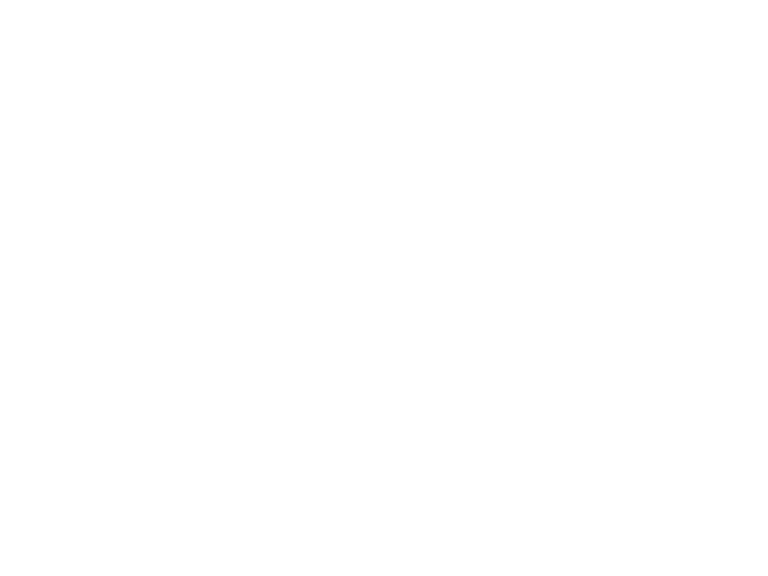

In [7]:
plt.savefig("bar_accident_graph")

In [8]:
#fig = gmaps.figure()
#locations = [
#        (-34.0, -59.166672),
#        (-32.23333, -64.433327),
#        (40.166672, 44.133331),
#        (51.216671, 5.0833302)
#    ]
#marker_layer = gmaps.marker_layer(locations)
#fig.add_layer(marker_layer)
#fig

In [9]:
#fig

In [10]:
#gmaps_url = "https://maps.googleapis.com/maps/api/geocode/json?"

#for i in range(len(lats)):
#    gmaps_query_url = gmaps_url+"latlng="+str(lngs[i])+","+str(lats[i])+"&key="+api_key
#    response=requests.get(gmaps_query_url)
    
#pprint(response.json())
   # print(gmaps_query_url)
    #print(lats[i])
    #print(lngs[i])
   # pprint(response.json())
    #break